<a href="https://colab.research.google.com/github/Akshay069/Netflix-Movies-And-TV-shows-Clustering/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---



---



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



###**Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##**Data Overview and Preprocessing**

In [1]:
# Importing Required liabraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting Google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading CSV file using Pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Machine Learning/Unsupervised Learning /Unsupervised Capstone Project/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# Seeing datset for the fisrt time.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Last five observations of the dataset.
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# Shape of the dataset.
print('- There are total of', df.shape[0], 'number of rows in the dataset')
print('- There are total of', df.shape[1], 'number of columns in the dataset')

- There are total of 7787 number of rows in the dataset
- There are total of 12 number of columns in the dataset


In [7]:
# Exploring the total 12 columns name in the dataset.
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* Listed_in is nothing but a genre so, for better understanding let's change its name to genres.

In [8]:
# Changing listed_in to genres.
df.rename(columns = {"listed_in":"genres"},inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [9]:
# Let's see the summary information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


* Above we can see that date_added is in string also in the 'October 19, 2020' formate Lets take year and month out for further EDA.
* But before doing any changes in the dataset let's make its copy.

In [10]:
# Creating copy of the dataset so that I could make changes on it.
Netflix_df = df.copy()

* As disscused above will extract and make new column 'Added Year' and 'Added Month' from column 'date_added'.

In [11]:
#adding columns of month and year of addition
Netflix_df['added_year'] = pd.DatetimeIndex(Netflix_df['date_added']).year
Netflix_df['added_month'] = pd.DatetimeIndex(Netflix_df['date_added']).month_name()
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,January


In [12]:
# Let's see the descriptive summary of the dataset.
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [13]:
# Checking for the distinct values present in the each feature.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

In [14]:
# Checking for the duplicate values.
df.duplicated().sum()

0

* There are no duplicates present in our dataset.

In [15]:
# Checking of null values in the dataset.
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

* We can see that there are null values present in four colomns which needed to be treated will treat them further in this section.

<BarContainer object of 12 artists>

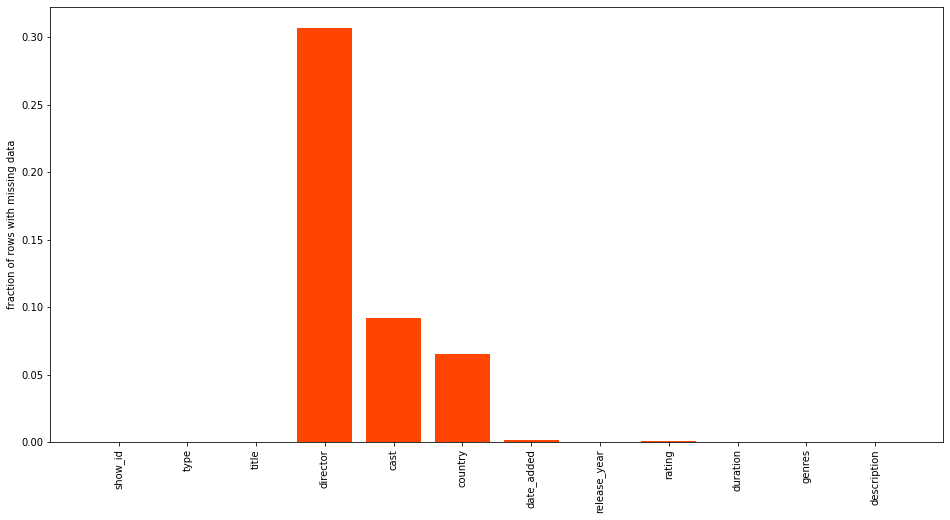

In [30]:
# Let's take visual of it.
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts, color='orangered')

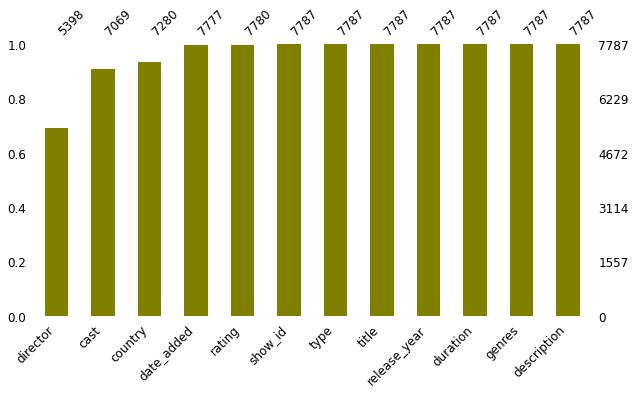

In [31]:
# Visualization null value distribution
import missingno as msno
msno.bar(df, log=False, sort='ascending', figsize=(10,5), fontsize=12, color='olive')

* We can clearly see that there are null values present in some of the features including director, cast, country, date_added and rating.
* We have almost 30% of values as null in director so instead of dropping I'm  replacing  those values with string 'Not Known' same will do for column cast and country as these are in high numbers.
* I'm dropping other null values from column date_added and rating as there null value count is very less.

In [18]:
# Treating null values as disscused.
Netflix_df['country'] = Netflix_df['country'].fillna('Not Known')
Netflix_df['director'] = Netflix_df['director'].fillna('Not Known') 
Netflix_df['cast'] = Netflix_df['cast'].fillna('Not Known')
Netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [19]:
# Checking for results.
Netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
added_year      0
added_month     0
dtype: int64

In [20]:
Netflix_df[Netflix_df['country'].str.endswith(",")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month
1402,s1403,Movie,City of Joy,Madeleine Gavin,Not Known,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...,2018.0,September
2315,s2316,Movie,Funan,Denis Do,"Bérénice Bejo, Louis Garrel, Colette Kieffer, ...","France, Belgium, Luxembourg, Cambodia,","July 18, 2020",2018,TV-14,87 min,"Dramas, International Movies",Separated from their young son during the brut...,2020.0,July
2827,s2828,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,","October 1, 2019",1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,2019.0,October
7433,s7434,Movie,Virunga,Orlando von Einsiedel,Not Known,"United Kingdom,","November 7, 2014",2014,TV-MA,100 min,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...,2014.0,November


* I obeserved some that there are some entries where there are comma present in the end of the country name.
* In above we can see that there are few entries are there will fix them on the basis of own understanding of genres by oberving the other parameters.

In [21]:
# As discussed above let's fill these values with related genres.
Netflix_df.loc[1402,'country'] = 'United States'
Netflix_df.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
Netflix_df.loc[2827,'country'] = 'Poland'
Netflix_df.loc[7433,'country'] = 'United Kingdom'

In [22]:
# Let's check again.
Netflix_df[Netflix_df['country'].str.endswith(",")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month


* Ohh yeah they gone.

###**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


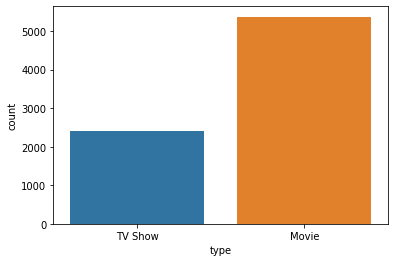

In [35]:

sns.countplot(Netflix_df['type'])

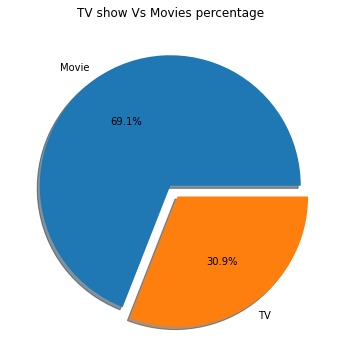

In [24]:
plt.figure(figsize=(6,6))
plt.pie(df['type'].value_counts(),labels=['Movie', 'TV'], explode = (0,0.1), autopct = '%1.1f%%', shadow=True)
plt.title('TV show Vs Movies percentage')
plt.show()

In [ ]:

order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,8))
g = sns.countplot(Netflix_df.rating, hue=Netflix_df.type, order=order, palette="Oranges_r");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()